# <p style="text-align:center;">StoryTelling: Análise de Crédito</p>

---

# **Tópicos**

<ol type="1">
  <li>Descrição do Problema;</li>
  <li>Código de importação de Bibliotecas;</li>
  <li>Geração de dados;</li>
  <li>Etapa de exploração;</li>
  <li>Transformação e limpeza dos dados;</li>
  <li>Etapa de análise;</li>
  <li>Resumo dos *insights* gerados.</li>
</ol>

---

## 1\. Descrição do Problema

Acredito que em qualquer instituição financeira que presta serviço de empréstimo aos seus clientes, antes de conceder tal empréstimo ou crédito, há o receio e a preocupação de analisar os dados de seus clientes e verificar se eles seriam inadimplentes ou adimplentes. Afinal, isso envolve um grande volume de dinheiro na instituição. Pensando nessa problemática, foi desenvolvido este modelo com a finalidade de portfolio.

---

## 2\. Código de importação de Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


---

## 3\. Geração de dados

In [6]:
df = pd.read_csv("clientes.csv", na_values='na')

---

## 4\. Etapa de exploração

Vamos explorar dados de crédito. Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Vamos começar lendos os dados num dataframe `pandas`.

In [7]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Com os dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **4.1. Estrutura** 

In [8]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

In [9]:
df[df['default'] == 0].shape # verificando a quantidade de clientes adimplentes

(8500, 16)

In [10]:
df[df['default'] == 1].shape # verificando a quantidade de clientes inadimplentes 

(1627, 16)

In [11]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape    # verificando a proporção de clientes inadimplentes e adimplentes 
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [13]:
print(f"A proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão de clientes adimplentes é de 83.93%
A proporcão de clientes inadimplentes é de 16.07%


Até agora, descobrimos que a quantidade de linhas é igual a `10127` e o número de colunas é igual a `16`. Verificamos a quantidade e proporção dos clientes adimplentes e inadimplentes: há um total de `8500` pessoas adimplentes, o que equivale `83,93%` da nossa base de dados. Quanto aos inadimplentes, são `1627` pessoas, correspondendo a `16,07%` da nossa base de dados.

### **4.2. Schema**

In [14]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 - Colunas e seus respectivos tipos de dados.

In [15]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

> Atributos categóricos são características que representam diferentes grupos ou categorias. Essas categorias podem ser nominais (sem ordem específica) ou ordinais (com uma ordem natural). Exemplos incluem gênero (masculino/feminino) e classe social (alta/média/baixa). Eles são frequentemente representados como strings.

In [16]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


**Na nossa seleção de dados categóricos, observamos que tanto a coluna "limite_de_credito" quanto a "valor_transacoes_12m", que deveriam ser atributos numéricos, apareceram em nosso filtro. Isso se deve ao padrão dos dados, em que os valores estão no formato brasileiro, utilizando ponto e vírgula, enquanto o pandas trabalha e filtra com base no padrão americano. Levando isso em consideração, podemos compreender por que os dados foram interpretados como categóricos. Cabe a nós, na etapa de limpeza, encontrar maneiras de resolver essa questão.**

 - Atributos **numéricos**.

> Atributos numéricos são características representadas por valores numéricos. Eles podem ser contínuos, como idade ou renda, ou discretos, como quantidade de filhos ou número de quartos em uma casa. Esses atributos são importantes na análise de dados e modelagem estatística, pois muitos métodos estatísticos e algoritmos de aprendizado de máquina operam diretamente com valores numéricos.

In [17]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() # tiramos o "id" da seleção pela falta de relevãnçia

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Nesta etapa, analisamos os dados categóricos e numéricos do nosso esquema de dados e identificamos um problema em relação às colunas "limite_de_credito" e "valor_transacoes_12m".

### **4.3. Dados faltantes** 

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

Podemos verificar quais colunas possuem dados faltantes.

In [18]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

> A função df.isna().any() retorna valores booleanos, onde True indica que há valores faltantes na respectiva coluna e False indica que não há valores faltantes. Então, os valores True indicam onde os dados estão faltando.

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [19]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [20]:
stats_dados_faltantes(df=df)  # dados faltantes em proporção a base de dados inteira 

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [21]:
stats_dados_faltantes(df=df[df['default'] == 0]) # dados faltantes de adimplentes na nossa base 

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [22]:
stats_dados_faltantes(df=df[df['default'] == 1])  # dados faltantes de inadimplentes na nossa base 

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}



Na nossa etapa final de exploração de dados, analisamos os dados faltantes. Observamos a quantidade e proporção dos dados faltantes em toda a base de dados, assim como a quantidade e proporção referente aos adimplentes e inadimplentes.

---

## 5\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **5.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [24]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [25]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22'] # teste de aplicação
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [26]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema* e verificar se foi resolvido

In [27]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [28]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [29]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **5.2. Remoção de dados faltantes** 

Como a proporção de dados faltantes entre adimplentes e inadimplentes é próxima, a exclusão é um caminho viável para garantir que trabalhemos com uma base de dados sólida.

> Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [30]:
df.dropna(inplace=True) # remoção de todos os dados faltantes

Vamos analisar a estrutura dos dados novamente.

In [31]:
df.shape

(7081, 16)

In [32]:
df[df['default'] == 0].shape

(5968, 16)

In [33]:
df[df['default'] == 1].shape

(1113, 16)

In [34]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [35]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%") # antiga proporção
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%") # nova proporção
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%") # antiga 
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%") # nova

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Nesta etapa, corrigimos as colunas "limite_de_credito" e "valor_transacoes_12m" de categóricas para numéricas e realizamos a limpeza dos dados faltantes. Agora temos uma base sólida o suficiente para iniciar nossas análises.

## 6\. Etapa de análise


In [37]:
sns.set_style("whitegrid")

In [42]:
df_adimplente = df[df['default'] == 0]

In [43]:
df_inadimplente = df[df['default'] == 1]

### **6.1. Visualizações númericas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

> Optamos por pular as visualizações categóricas, pois não estávamos obtendo nenhum insight relevante através delas.

In [40]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


 - Quantidade de Transações nos Últimos 12 Meses

C:\Users\valdi\AppData\Local\Temp\ipykernel_10960\3045762736.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


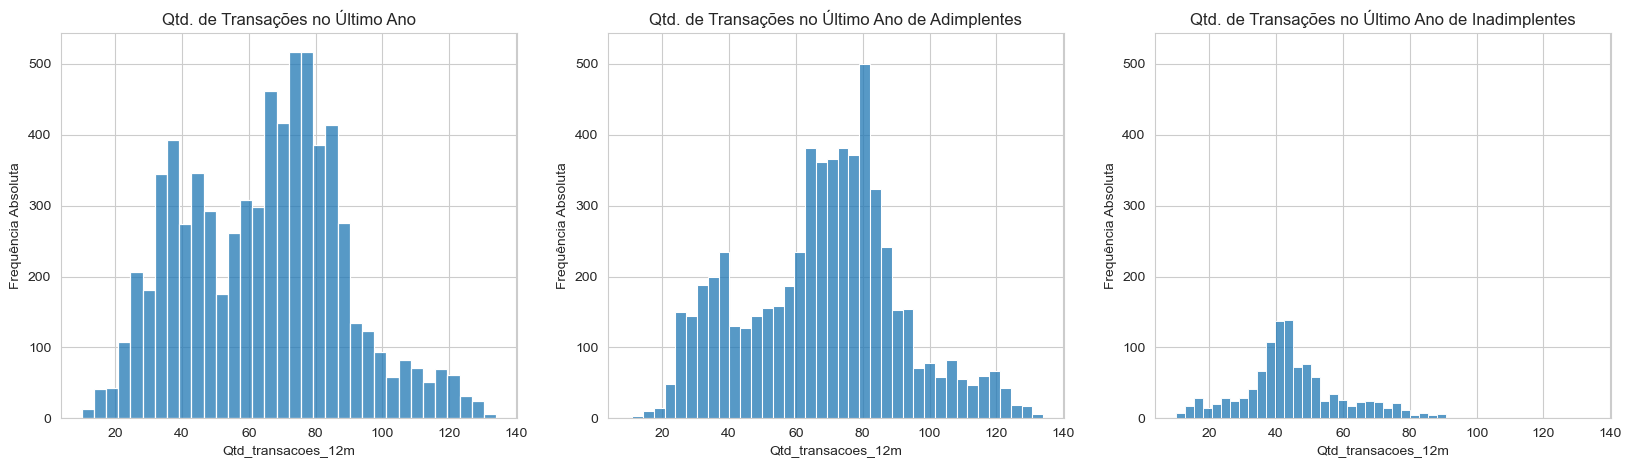

In [44]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

> Observando o gráfico sobre a quantidade das transações dos últimos 12 meses, podemos notar que há dois picos gerais de transações, um entre 20 e 40 e outro entre 60 e 80. Ao examinar o gráfico dos inadimplentes, percebemos que as transações desses clientes não ultrapassam 80 por ano, atingindo seu pico em 40 transações.

 - Valor das Transações nos Últimos 12 Meses

C:\Users\valdi\AppData\Local\Temp\ipykernel_10960\3932491844.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


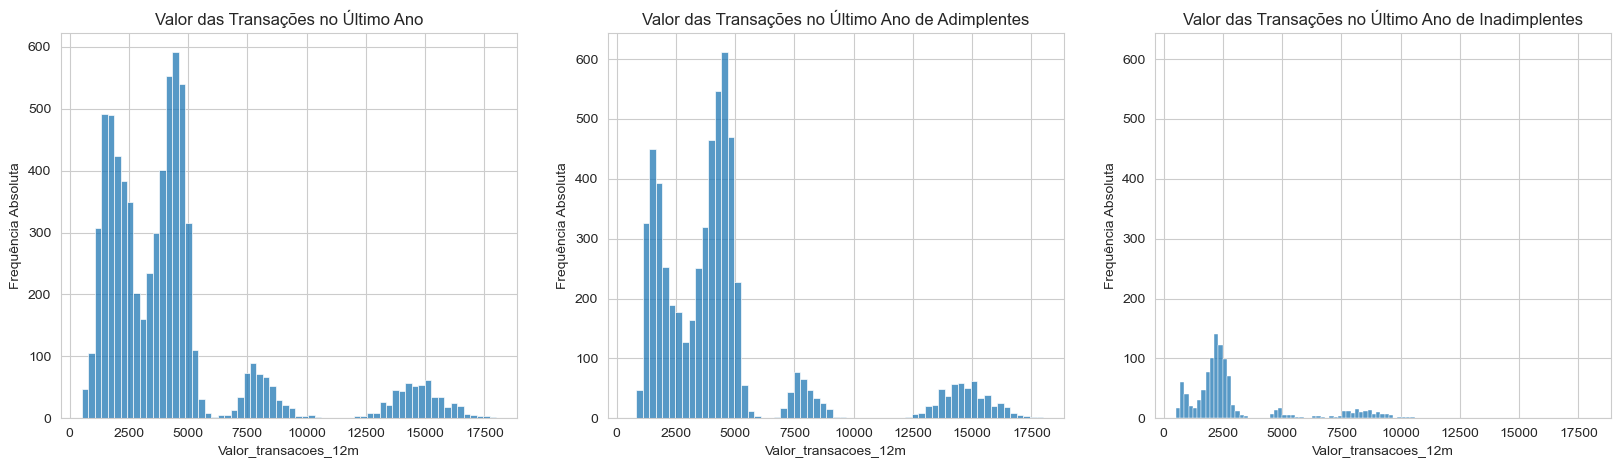

In [45]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

> Podemos notar que os clientes inadimplentes apresentam um padrão de comportamento no qual seus valores de transação nos últimos 12 meses são muito próximos de 2500.

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

C:\Users\valdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


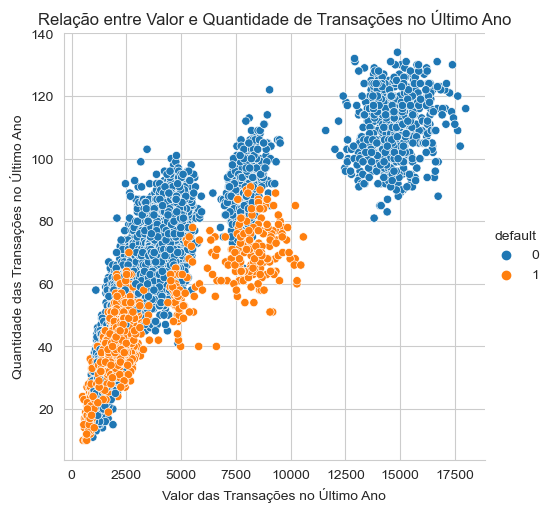

In [46]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

> Pode-se perceber nessa relação entre a quantidade e o valor das transações que pessoas que realizam muitas transações com valores altos têm poucas chances de se tornarem inadimplentes. Em contrapartida, pessoas que realizam poucas transações com valores baixos têm mais chances de se tornarem inadimplentes.

---

## 7\. Resumo dos insights gerados

**Com base em todos os processos realizados até o momento, podemos extrair os seguintes insights: se nossa instituição financeira conceder crédito a pessoas que realizam um alto volume de transações (`a partir de 80 transações por ano`) e com valores elevados (`a partir de 5000`), as chances de se tornarem inadimplentes e causarem prejuízos à empresa são muito baixas. Por outro lado, clientes que realizam um baixo volume de transações (`em média 40 vezes por ano`) e com valores baixos (`em média 2500`) têm uma chance consideravelmente alta de se tornarem inadimplentes e causarem prejuízos à empresa se o banco optar por conceder crédito a esses clientes.**

**Com base nesses insights, podemos traçar o perfil de nossos clientes e oferecer `planos de crédito diferentes para cada um`. Aos clientes com poucas chances de se tornarem inadimplentes, é possível conceder um crédito maior, enquanto aos clientes com muitas chances de se tornarem inadimplentes, é recomendável conceder pouco ou até mesmo nenhum crédito.**